# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report, auc, roc_auc_score

from imblearn.over_sampling import RandomOverSampler

# Load Dataset

In [ ]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Preprocessing Data

In [ ]:
# Drop kolom yang tidak digunakan
df = df.drop(columns='id')

In [ ]:
# Melihat tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
# Mengubah nilai pada kolom hypertension, heart_disease, dan stroke
binary_columns = df.select_dtypes(include=['int64']).columns
mapping = {0: 'No', 1: 'Yes'}

for col in binary_columns:
    df[col] = df[col].map(mapping)

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,Yes,No,Yes,Private,Urban,83.75,NaN,never smoked,No
5106,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
5107,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,No
5108,Male,51.0,No,No,Yes,Private,Rural,166.29,25.6,formerly smoked,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   object 
dtypes: float64(3), object(8)
memory usage: 439.3+ KB


In [ ]:
# Menghitung nilai tiap kategori di setiap data kategorik
gender_counts = df['gender'].value_counts()
hypertension_counts = df['hypertension'].value_counts()
heart_disease_counts = df['heart_disease'].value_counts()
ever_married_counts = df['ever_married'].value_counts()
work_type_counts = df['work_type'].value_counts()
residence_type_counts = df['Residence_type'].value_counts()
smoking_status_counts = df['smoking_status'].value_counts()
stroke_counts = df['stroke'].value_counts()

print("\n",gender_counts)
print("\n",hypertension_counts)
print("\n",heart_disease_counts)
print("\n",ever_married_counts)
print("\n",work_type_counts)
print("\n",residence_type_counts)
print("\n",smoking_status_counts)
print("\n",stroke_counts)


 gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

 hypertension
No     4612
Yes     498
Name: count, dtype: int64

 heart_disease
No     4834
Yes     276
Name: count, dtype: int64

 ever_married
Yes    3353
No     1757
Name: count, dtype: int64

 work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

 Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

 smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

 stroke
No     4861
Yes     249
Name: count, dtype: int64


In [ ]:
# Menghapus data 'Other' pada kolom gender
df = df[df['gender'] != 'Other']

In [ ]:
# Mengganti nilai 'Unknown' pada kolom smoking_status menjadi missing value
df.loc[df['smoking_status'] == 'Unknown', 'smoking_status'] = np.nan

In [ ]:
# Menghitung kembali nilai tiap kategori di setiap data kategorik
gender_counts = df['gender'].value_counts()
hypertension_counts = df['hypertension'].value_counts()
heart_disease_counts = df['heart_disease'].value_counts()
ever_married_counts = df['ever_married'].value_counts()
work_type_counts = df['work_type'].value_counts()
residence_type_counts = df['Residence_type'].value_counts()
smoking_status_counts = df['smoking_status'].value_counts()
stroke_counts = df['stroke'].value_counts()

print("\n",gender_counts)
print("\n",hypertension_counts)
print("\n",heart_disease_counts)
print("\n",ever_married_counts)
print("\n",work_type_counts)
print("\n",residence_type_counts)
print("\n",smoking_status_counts)
print("\n",stroke_counts)


 gender
Female    2994
Male      2115
Name: count, dtype: int64

 hypertension
No     4611
Yes     498
Name: count, dtype: int64

 heart_disease
No     4833
Yes     276
Name: count, dtype: int64

 ever_married
Yes    3353
No     1756
Name: count, dtype: int64

 work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

 Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

 smoking_status
never smoked       1892
formerly smoked     884
smokes              789
Name: count, dtype: int64

 stroke
No     4860
Yes     249
Name: count, dtype: int64


In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,Yes,No,Yes,Private,Urban,83.75,NaN,never smoked,No
5106,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
5107,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,No
5108,Male,51.0,No,No,Yes,Private,Rural,166.29,25.6,formerly smoked,No


In [ ]:
# Memeriksa missing value
(df.isna().sum()/len(df))*100

gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.934234
smoking_status       30.221178
stroke                0.000000
dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical = df.select_dtypes(include=['object']).columns

# Membuat objek LabelEncoder untuk imputasi missing value
label_encoders = {}
for feature in categorical:
    le = LabelEncoder()
    df.loc[:,feature] = le.fit_transform(df[feature].astype(str))
    label_encoders[feature] = le

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,0,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,0,0


In [ ]:
df.loc[df['smoking_status'] == 1, 'smoking_status'] = np.nan
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,0,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,0,0


In [ ]:
# Melakukan imputasi menggunakan K-Nearest Neighbours (KNN)
imputer = KNNImputer(n_neighbors=1)
array = imputer.fit_transform(df)
df = pd.DataFrame(array, columns=df.columns)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,228.69,36.6,0.0,1.0
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,33.8,2.0,1.0
2,1.0,80.0,0.0,1.0,1.0,2.0,0.0,105.92,32.5,2.0,1.0
3,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,34.4,3.0,1.0
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,80.0,1.0,0.0,1.0,2.0,1.0,83.75,25.0,2.0,0.0
5105,0.0,81.0,0.0,0.0,1.0,3.0,1.0,125.20,40.0,2.0,0.0
5106,0.0,35.0,0.0,0.0,1.0,3.0,0.0,82.99,30.6,2.0,0.0
5107,1.0,51.0,0.0,0.0,1.0,2.0,0.0,166.29,25.6,0.0,0.0


In [ ]:
# Memeriksa kembali jumlah missing value
df.isna().mean()*100

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [ ]:
# Memeriksa data duplikat
df.duplicated().sum()

0

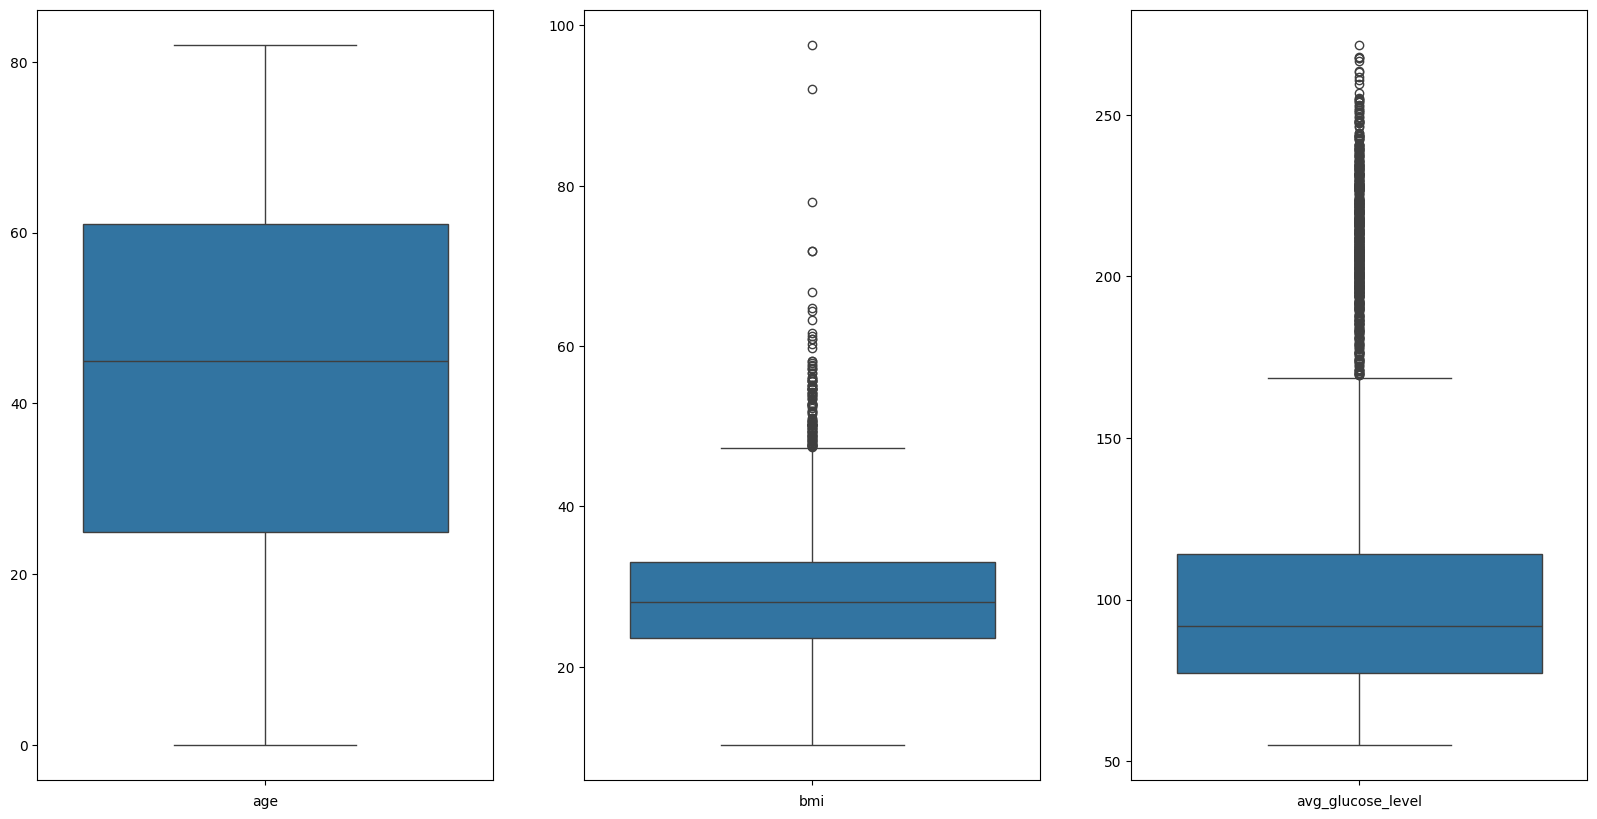

In [ ]:
# Memeriksa outlier pada data numerik
numeric_variables = ['age','bmi','avg_glucose_level']

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
for idx, col in enumerate(numeric_variables):
    plt.subplot(1, 3, idx + 1)
    sns.boxplot(y=df[col])
    plt.xlabel(col)
    plt.ylabel('')
plt.show()

In [ ]:
# Kolom age bebas dari outlier. Sekarang dilakukan handling outlier
# untuk avg_glucose_level tidak dilakukan handling outlier karena hal tersebut bisa terjadi di dunia kesehatan
# untuk bmi dilakukan handling outlier menggunakan kuartil

# Menghitung kuartil atas dan kuartil bawah
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
# Menghitung IQR
IQR = Q3 - Q1
# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Menghapus outlier
df = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

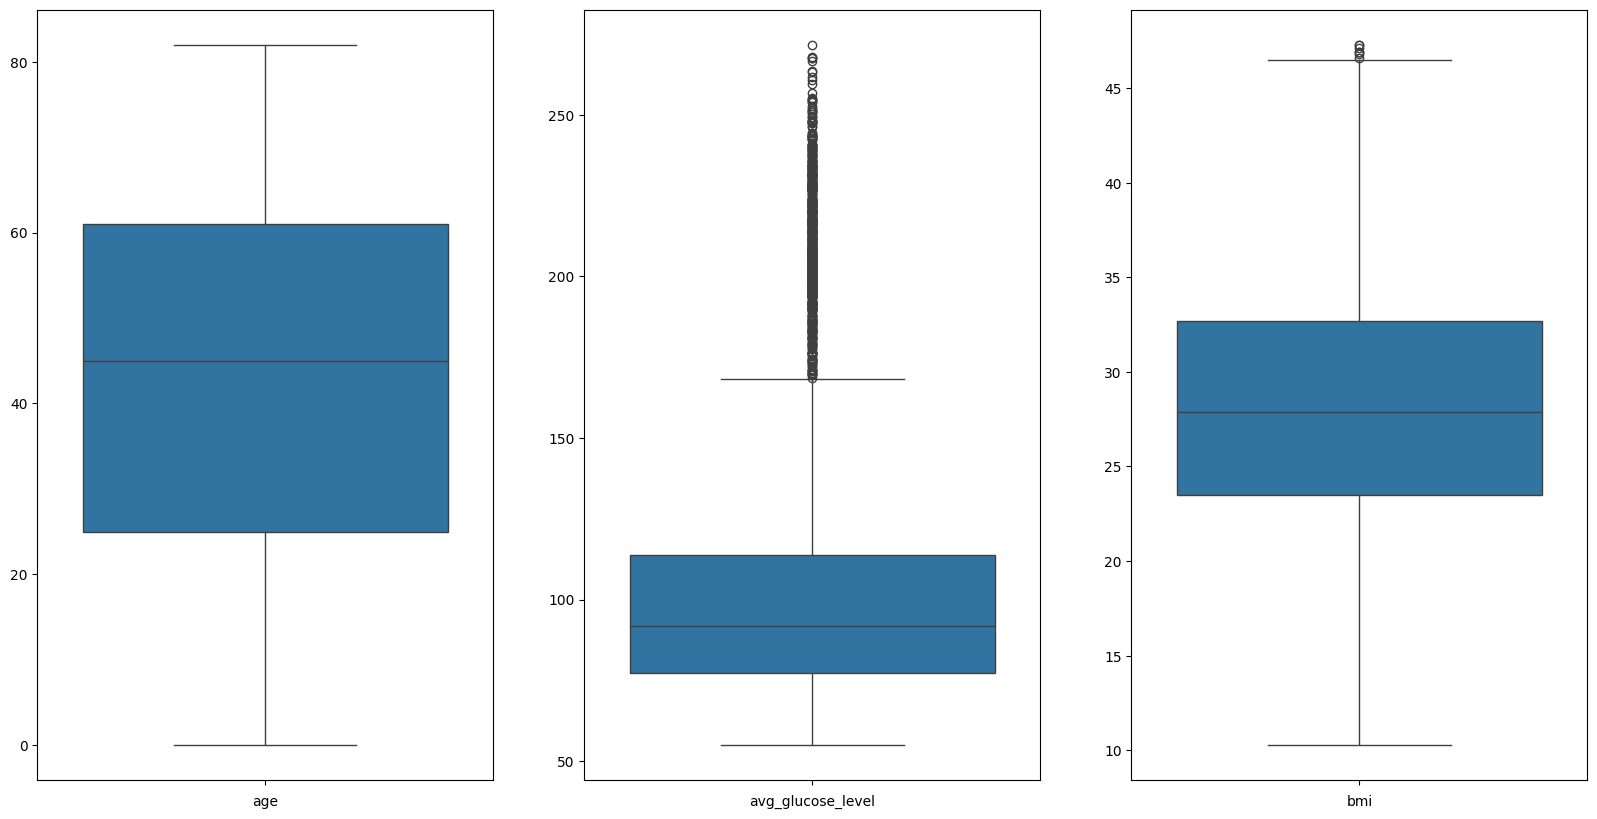

In [ ]:
# Boxplot setelah handling outlier
numeric_variables = ['age', 'avg_glucose_level', 'bmi']

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
for idx, col in enumerate(numeric_variables):
    plt.subplot(1, 3, idx + 1)
    sns.boxplot(y=df[col])
    plt.xlabel(col)
    plt.ylabel('')
plt.show()

In [ ]:
# # Mengembalikan data ke bentuk asalnya untuk kolom kategorikal
# for feature in categorical:
#     le = label_encoders[feature]
#     df[feature] = le.inverse_transform(df[feature].astype(int))
#     df[feature] = df[feature].astype(object)

In [ ]:
df = df.rename(columns={
    'gender' : 'Gender',
    'age' : 'Age',
    'hypertension' : 'Hypertension',
    'heart_disease' : 'Heart Disease',
    'ever_married' : 'Ever Married',
    'work_type' : 'Work Type',
    'Residence_type' : 'Residence Type',
    'avg_glucose_level' : 'Average Glucose Level',
    'bmi' : 'BMI',
    'smoking_status' : 'Smoking Status',
    'stroke' : 'Stroke'
})

df.columns

Index(['Gender', 'Age', 'Hypertension', 'Heart Disease', 'Ever Married',
       'Work Type', 'Residence Type', 'Average Glucose Level', 'BMI',
       'Smoking Status', 'Stroke'],
      dtype='object')

In [ ]:
df

,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,228.69,36.6,0.0,1.0
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,33.8,2.0,1.0
2,1.0,80.0,0.0,1.0,1.0,2.0,0.0,105.92,32.5,2.0,1.0
3,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,34.4,3.0,1.0
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,80.0,1.0,0.0,1.0,2.0,1.0,83.75,25.0,2.0,0.0
5105,0.0,81.0,0.0,0.0,1.0,3.0,1.0,125.20,40.0,2.0,0.0
5106,0.0,35.0,0.0,0.0,1.0,3.0,0.0,82.99,30.6,2.0,0.0
5107,1.0,51.0,0.0,0.0,1.0,2.0,0.0,166.29,25.6,0.0,0.0


In [ ]:
# from google.colab import files
# # Save the DataFrame to a CSV file
# df.to_csv('/content/data-bersih-encoding.csv', index=False)

# # Download the CSV file
# files.download('/content/data-bersih-encoding.csv')

In [ ]:
X = df.drop(columns='Stroke')
y = df['Stroke']

In [ ]:
oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)

Original dataset shape: (4990, 10) (4990,)
Resampled dataset shape: (9488, 10) (9488,)


In [ ]:
X = X_resampled
y = y_resampled

# Feature Selection

In [ ]:
rf_fe_imp = RandomForestClassifier(n_estimators=500,n_jobs=-1)
rf_fe_imp.fit(X, y)
feature_importances = pd.DataFrame(zip(X.columns,rf_fe_imp.feature_importances_),
                                   columns=['Features','Importance Percentage']).sort_values(
                                       by='Importance Percentage',ascending=False)
feature_importances

,Features,Importance Percentage
1,Age,0.392123
7,Average Glucose Level,0.216323
8,BMI,0.178498
5,Work Type,0.046851
9,Smoking Status,0.039826
4,Ever Married,0.033113
2,Hypertension,0.028443
0,Gender,0.022834
6,Residence Type,0.021918
3,Heart Disease,0.020072


In [ ]:
importances_rf = rf_fe_imp.feature_importances_
indices_rf = importances_rf.argsort()[-5:][::-1]
selected_features_rf = df.columns[indices_rf].tolist()

X = X[selected_features_rf]
df = pd.DataFrame(X, columns=selected_features_rf)
df['Stroke'] = y
df

,Age,Average Glucose Level,BMI,Work Type,Smoking Status,Stroke
0,67.0,228.69,36.6,2.0,0.0,1.0
1,61.0,202.21,33.8,3.0,2.0,1.0
2,80.0,105.92,32.5,2.0,2.0,1.0
3,49.0,171.23,34.4,2.0,3.0,1.0
4,79.0,174.12,24.0,3.0,2.0,1.0
...,...,...,...,...,...,...
9483,71.0,216.94,30.9,0.0,2.0,1.0
9484,74.0,60.98,25.8,3.0,2.0,1.0
9485,79.0,110.85,24.1,2.0,0.0,1.0
9486,72.0,219.91,30.0,2.0,2.0,1.0


In [ ]:
X = df.drop(columns='Stroke')
y = df['Stroke']

In [ ]:
X

,Age,Average Glucose Level,BMI,Work Type,Smoking Status
0,67.0,228.69,36.6,2.0,0.0
1,61.0,202.21,33.8,3.0,2.0
2,80.0,105.92,32.5,2.0,2.0
3,49.0,171.23,34.4,2.0,3.0
4,79.0,174.12,24.0,3.0,2.0
...,...,...,...,...,...
9483,71.0,216.94,30.9,0.0,2.0
9484,74.0,60.98,25.8,3.0,2.0
9485,79.0,110.85,24.1,2.0,0.0
9486,72.0,219.91,30.0,2.0,2.0


In [ ]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
9483    1.0
9484    1.0
9485    1.0
9486    1.0
9487    1.0
Name: Stroke, Length: 9488, dtype: float64

In [ ]:
# from google.colab import files
# # Save the DataFrame to a CSV file
# X.to_csv('/content/X-encoded.csv', index=False)
# y.to_csv('/content/y-encoded.csv', index=False)
# # Download the CSV file
# files.download('/content/X-encoded.csv')
# files.download('/content/y-encoded.csv')

# Classification

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    return accuracy, sensitivity, specificity, roc_auc, fpr, tpr

		$$$ Extreme Gradient Boosting $$$



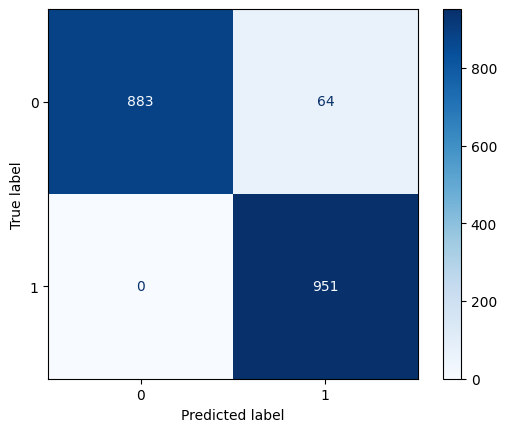


Accuracy: 0.9662802950474183
Sensitivity: 1.0
Specificity: 0.9324181626187962
ROC AUC for: 0.993967335001116


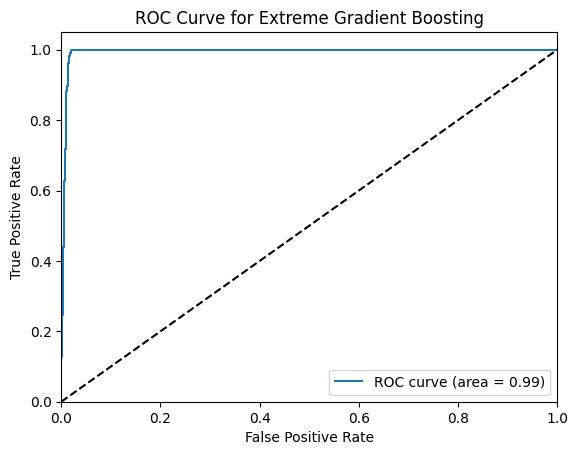



		$$$ Logistic Regression $$$



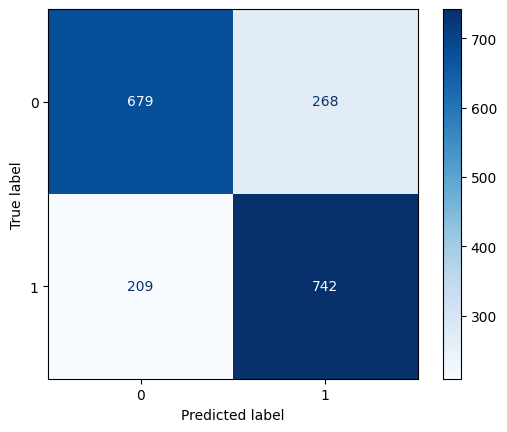


Accuracy: 0.7486828240252897
Sensitivity: 0.7802313354363828
Specificity: 0.7170010559662091
ROC AUC for: 0.8276054661518971


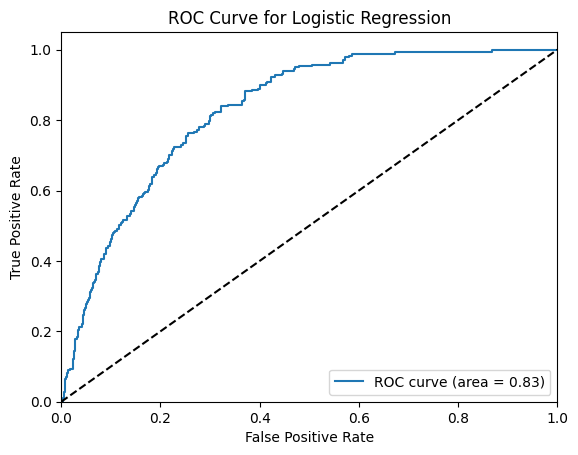



		$$$ Random Forest Classifier $$$



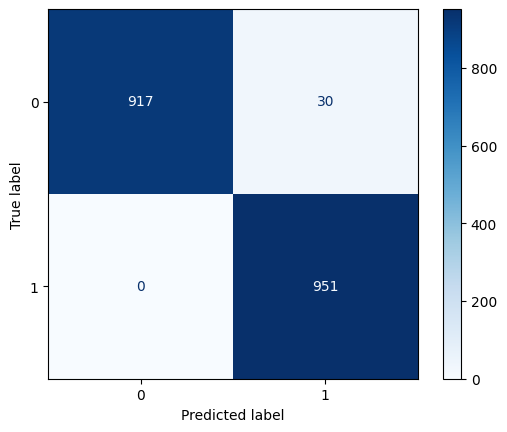


Accuracy: 0.9841938883034773
Sensitivity: 1.0
Specificity: 0.9683210137275607
ROC AUC for: 1.0


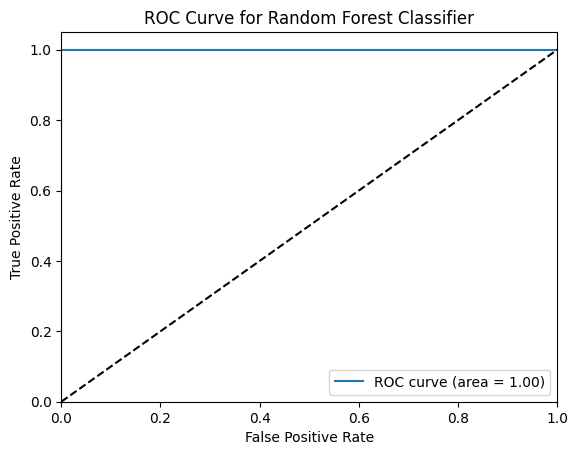



		$$$ Decision Tree Classifier $$$



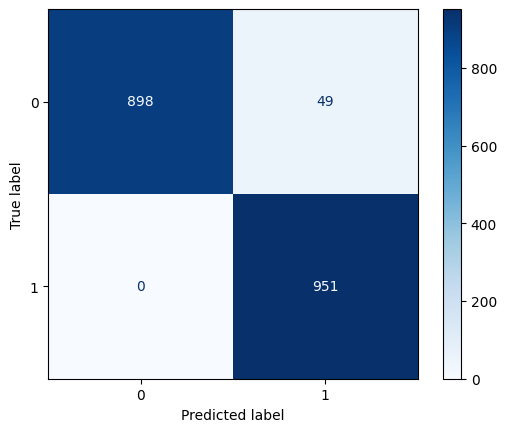


Accuracy: 0.9741833508956796
Sensitivity: 1.0
Specificity: 0.9482576557550159
ROC AUC for: 0.974128827877508


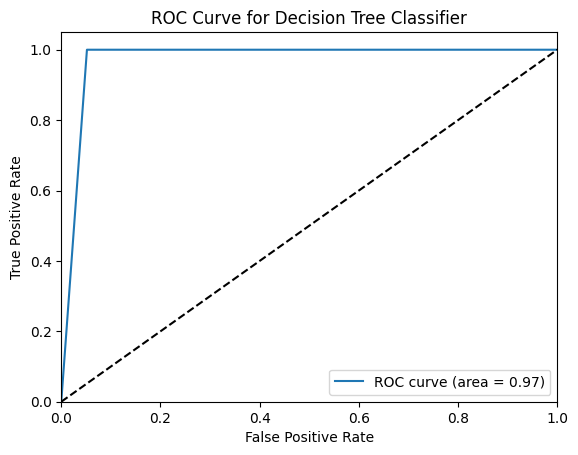

In [ ]:
models = {
    'Extreme Gradient Boosting': XGBClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
}

for name, model in models.items():
    model.fit(X_train, y_train)

    acc, sens, spec, roc_auc, fpr, tpr = evaluate_model(model, X_test, y_test)
    y_pred = model.predict(X_test)
    y_pred_tr = model.predict(X_train)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)

    # Confusion Matrix
    print(f"\t\t$$$ {name} $$$\n")
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
    print(f"\nAccuracy: {acc}")
    print(f"Sensitivity: {sens}")
    print(f"Specificity: {spec}")
    print(f"ROC AUC for: {roc_auc}")

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()
    print("\n")

# Model Evaluation

In [ ]:
# Repeated Holdout
print("\nRepeated Holdout:")
for model_name, model in models.items():
    accuracies, sensitivities, specificities, roc_aucs = [], [], [], []
    for i in range(10):  # Repeat the holdout process 10 times
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        model.fit(X_train, y_train)
        acc, sens, spec, roc_auc, fpr, tpr = evaluate_model(model, X_test, y_test)
        accuracies.append(acc)
        sensitivities.append(sens)
        specificities.append(spec)
        roc_aucs.append(roc_auc)
    print(f"\nAverage accuracy for {model_name} over 10 repetitions: {np.mean(accuracies)}")
    print(f"Average sensitivity for {model_name} over 10 repetitions: {np.mean(sensitivities)}")
    print(f"Average specificity for {model_name} over 10 repetitions: {np.mean(specificities)}")
    print(f"Average ROC AUC for {model_name} over 10 repetitions: {np.mean(roc_aucs)}")




Repeated Holdout:

Average accuracy for Extreme Gradient Boosting over 10 repetitions: 0.9677028451001053
Average sensitivity for Extreme Gradient Boosting over 10 repetitions: 1.0
Average specificity for Extreme Gradient Boosting over 10 repetitions: 0.9355675023974621
Average ROC AUC for Extreme Gradient Boosting over 10 repetitions: 0.9957229318637364

Average accuracy for Logistic Regression over 10 repetitions: 0.7633825079030558
Average sensitivity for Logistic Regression over 10 repetitions: 0.8132672496716007
Average specificity for Logistic Regression over 10 repetitions: 0.7137547973653076
Average ROC AUC for Logistic Regression over 10 repetitions: 0.8401453585010428

Average accuracy for Random Forest Classifier over 10 repetitions: 0.9874077976817702
Average sensitivity for Random Forest Classifier over 10 repetitions: 1.0
Average specificity for Random Forest Classifier over 10 repetitions: 0.9748679680844907
Average ROC AUC for Random Forest Classifier over 10 repetitio


K-Fold Cross-Validation:

Average accuracy for Extreme Gradient Boosting using 10-fold CV: 0.9705944350758853
Average sensitivity for Extreme Gradient Boosting using 10-fold CV: 1.0
Average specificity for Extreme Gradient Boosting using 10-fold CV: 0.9411888701517707
Average ROC AUC for Extreme Gradient Boosting using 10-fold CV: 0.99617838473165


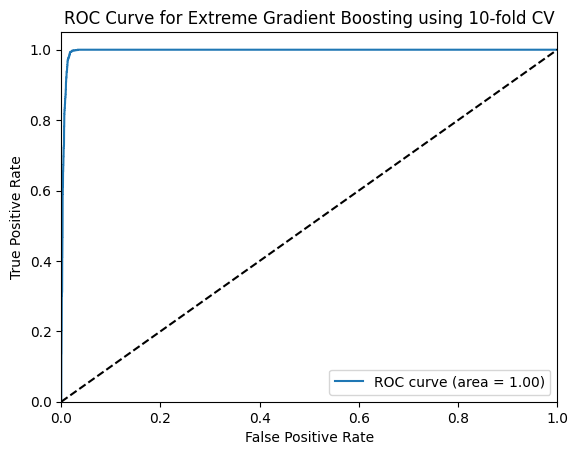


Average accuracy for Logistic Regression using 10-fold CV: 0.7650716694772344
Average sensitivity for Logistic Regression using 10-fold CV: 0.809654300168634
Average specificity for Logistic Regression using 10-fold CV: 0.7204890387858347
Average ROC AUC for Logistic Regression using 10-fold CV: 0.8399212087194902


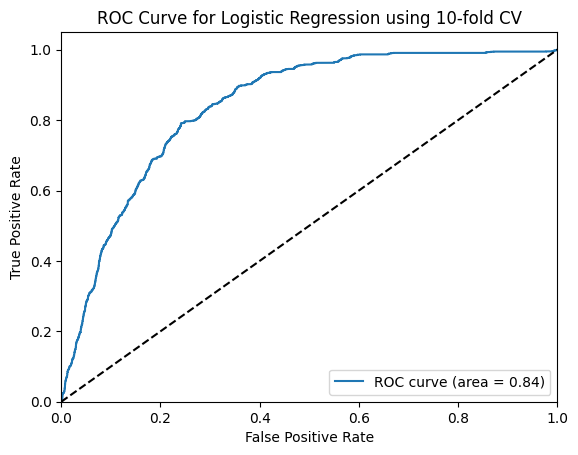


Average accuracy for Random Forest Classifier using 10-fold CV: 0.9885118043844857
Average sensitivity for Random Forest Classifier using 10-fold CV: 1.0
Average specificity for Random Forest Classifier using 10-fold CV: 0.9770236087689713
Average ROC AUC for Random Forest Classifier using 10-fold CV: 1.0


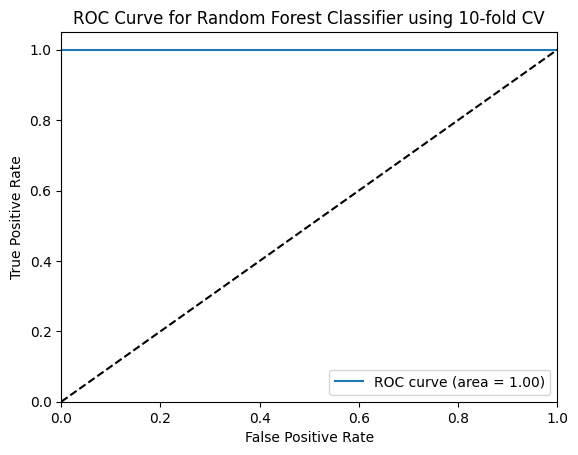


Average accuracy for Decision Tree Classifier using 10-fold CV: 0.9758642495784149
Average sensitivity for Decision Tree Classifier using 10-fold CV: 1.0
Average specificity for Decision Tree Classifier using 10-fold CV: 0.9517284991568297
Average ROC AUC for Decision Tree Classifier using 10-fold CV: 0.9758642495784148


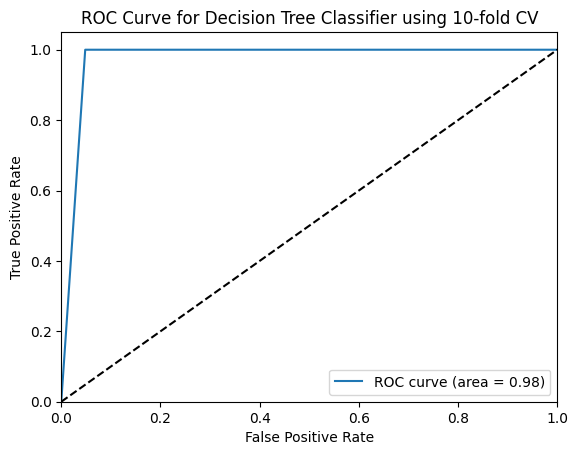

In [ ]:
# K-Fold Cross-Validation
print("\nK-Fold Cross-Validation:")
for model_name, model in models.items():
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X, y, cv=cv)
    y_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
    accuracy = accuracy_score(y, y_pred)
    sensitivity = recall_score(y, y_pred)
    specificity = recall_score(y, y_pred, pos_label=0)
    roc_auc = roc_auc_score(y, y_proba)
    fpr, tpr, _ = roc_curve(y, y_proba)

    print(f"\nAverage accuracy for {model_name} using 10-fold CV: {accuracy}")
    print(f"Average sensitivity for {model_name} using 10-fold CV: {sensitivity}")
    print(f"Average specificity for {model_name} using 10-fold CV: {specificity}")
    print(f"Average ROC AUC for {model_name} using 10-fold CV: {roc_auc}")

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name} using 10-fold CV')
    plt.legend(loc="lower right")
    plt.show()